# Practical 5

In [ ]:
''' 
Aim:
    Apply simple K-means algorithm for clustering any dataset. Compare the performance of
    clusters by varying the algorithm parameters. For a given set of parameters, plot a line graph
    depicting MSE obtained after each iteration.
'''

In [ ]:
# K-Means clustering + MSE vs iteration plot

Converged at iteration 4


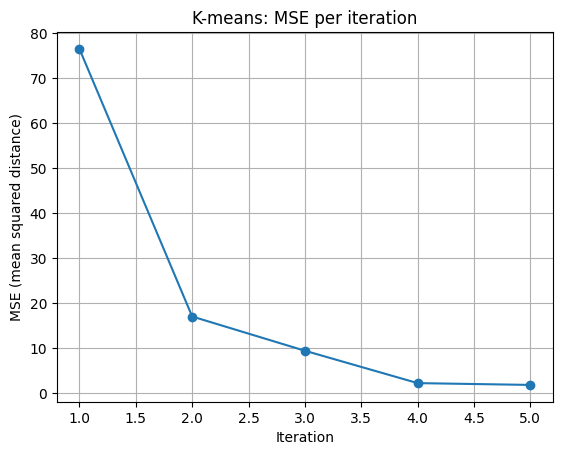

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def kmeans_trace(X, k, max_iter=50, tol=1e-4, random_state=None):
    rng = np.random.RandomState(random_state)
    n, d = X.shape
    # init: random k points from X
    idx = rng.choice(n, k, replace=False)
    centroids = X[idx].copy()
    mse_history = []
    for it in range(max_iter):
        # assign
        dist = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)  # n x k
        labels = np.argmin(dist, axis=1)
        # compute MSE
        mse = np.mean(np.min(dist**2, axis=1))
        mse_history.append(mse)
        # update centroids
        new_centroids = np.zeros_like(centroids)
        for j in range(k):
            points = X[labels == j]
            if len(points) == 0:
                # reinitialize empty centroid
                new_centroids[j] = X[rng.choice(n)]
            else:
                new_centroids[j] = points.mean(axis=0)
        # check convergence by centroid movement
        shift = np.linalg.norm(new_centroids - centroids)
        centroids = new_centroids
        if shift < tol:
            print("Converged at iteration", it)
            break
    return centroids, labels, mse_history

# Example on synthetic data:
X, _ = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42)
centroids, labels, mse_hist = kmeans_trace(X, k=4, max_iter=100, random_state=42)

plt.plot(range(1, len(mse_hist)+1), mse_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('MSE (mean squared distance)')
plt.title('K-means: MSE per iteration')
plt.grid(True)
plt.show()